# Lending Club Case Study

## Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Business Objectives

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Constraints

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. <b>Loan accepted</b>: If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid</b>: Applicant has fully paid the loan (the principal and the interest rate)

    - <b>Current</b>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - <b>Charged-off</b>: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. <b>Loan rejected</b>: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Supress warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the Load dataset
loan_df = pd.read_csv('loan.csv')

In [4]:
# Checking the rows and columns in the loan file
loan_df.shape

(39717, 111)

In [5]:
# General Information about the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The data has been read into the dataframe with column names, and it doesn't have any footers. Now, we can start the data clean up.**

### Data Cleanup

During Data clean up we need to identify the columns that will not add any value to the analysis and remove them from our dataset, like single value across dataset, null values across dataset, high percentage of null values, text or description columns etc.

Also, we need to get rid of the data (row) that is not relevant for the analysis.

##### Before starting with analysis on the columns, it would be better to filter the data of interest. 

In [8]:
loan_df.loan_status.value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

###

As we need to analyse the loan applications that are likely to default or fully paid, the loans that are currently ongoing may not help. So, we need to remove them from dataset.

In [9]:
# Create a new dataframe from the loan_df by filtering the Fully Paid and Charged Off loan status.

closed_loan_df = loan_df[loan_df.loan_status.isin(['Fully Paid','Charged Off'])]

In [10]:
# Count of Closed Loan Dataframe

closed_loan_df.shape

(38577, 111)

In [11]:
# Percent of data/rows dropped from initial file
total_rows_loan_df = loan_df.shape[0]
total_rows_closed_loan_df = closed_loan_df.shape[0]
print(f'Total Data dropped from initial file: {round((total_rows_loan_df - total_rows_closed_loan_df)*100 /total_rows_loan_df, 2)}')


Total Data dropped from initial file: 2.87


In [12]:
# Check the columns with null value count
closed_loan_df.isnull().sum() *100/total_rows_closed_loan_df

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

 
###### It appears that few columns have 100% data as null. We can drop the columns.



In [13]:
closed_loan_df.dropna(axis = 1, how='all', inplace = True)

In [14]:
closed_loan_df.shape

(38577, 56)

In [15]:
(closed_loan_df.isnull().sum() *100/total_rows_closed_loan_df).sort_values()

id                             0.000000
earliest_cr_line               0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
total_acc                      0.000000
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
delinq_2yrs                    0.000000
total_pymnt_inv                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000
application_type               0.000000
acc_now_delinq                 0.000000
delinq_amnt                    0.000000
total_rec_prncp                0.000000
dti                            0.000000
inq_last_6mths                 0.000000
zip_code                       0.000000


The dataset contains two columns with high null percentage:

    - mths_since_last_record
    - mths_since_last_delinq

Also, the 'desc' column has 32% Null values and as per column definition, it is the "Loan description provided by the borrower". So, it will not add value to analysis.

These columns can be dropped.

In [16]:
#drop the three columns with high null value percentage from the datafame.
closed_loan_df.drop(columns = ['mths_since_last_record', 'mths_since_last_delinq', 'desc'], inplace = True)

In [17]:
closed_loan_df.shape

(38577, 53)

The columns contain a unique value will not add value to the analysis. The columns can be identified and removed from the dataset.

In [18]:
# Identify the columns and the number of unique values they hold.

closed_loan_df.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

Drop the columns where the value is unique across columns i.e. Unique values is 1.

In [19]:
# Get the list of columns where the unique values exactly 1.
columns_with_single_unique_values = closed_loan_df.columns[closed_loan_df.apply(lambda x: x.nunique() == 1)]
columns_with_single_unique_values

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [20]:
# drop the columns from the dataframe
closed_loan_df.drop(columns = columns_with_single_unique_values, inplace = True)

In [21]:
closed_loan_df.shape

(38577, 42)

In [22]:
#check the unique values again to verify the columns
closed_loan_df.nunique().sort_values()

loan_status                    2
term                           2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_prncp             6841
funded_amn


There are three columns which have unique values for each row of data. Also, these columns have below definition suggesting these values are assinged at the time of application:
    <ol> id: A unique LC assigned ID for the loan listing.</ol>
    <ol> member_id: A unique LC assigned Id for the borrower member.</ol>

**We can drop one of these two columns, as we may need to backtrack the data in case we need more info about a specific applciation later after analysis. So, Dropping member_id column.**


In [23]:
# drop the three columns from the dataframe
closed_loan_df.drop(columns = ['member_id'], inplace = True)

Similarly, the URL has below definition:
    <ol> url: URL for the LC page with listing data.</ol>

This does not appear to provide us any insight for the loan application. So, it can also be dropped. 

In [24]:
# drop the url column from the dataframe
closed_loan_df.drop(columns = ['url'], inplace = True)

In [25]:
closed_loan_df.shape

(38577, 40)

In [26]:
closed_loan_df.nunique().sort_values()

term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_prncp             6841
funded_amn

Looking at the above data, it appears that there are text columns like **emp_title** and **title** that may not have any significance on our analysis. The column needs to be evaluated separately.

In [27]:
closed_loan_df.title.value_counts().index.tolist()

['Debt Consolidation',
 'Debt Consolidation Loan',
 'Personal Loan',
 'Consolidation',
 'debt consolidation',
 'Credit Card Consolidation',
 'Home Improvement',
 'Debt consolidation',
 'Small Business Loan',
 'Credit Card Loan',
 'Personal',
 'Consolidation Loan',
 'Home Improvement Loan',
 'personal loan',
 'personal',
 'Loan',
 'Wedding Loan',
 'Car Loan',
 'consolidation',
 'Other Loan',
 'Credit Card Payoff',
 'Wedding',
 'Credit Card Refinance',
 'Major Purchase Loan',
 'Consolidate',
 'Medical',
 'Credit Card',
 'home improvement',
 'Credit Cards',
 'My Loan',
 'Debt',
 'loan',
 'Business Loan',
 'Freedom',
 'Moving Loan',
 'Personal loan',
 'consolidate',
 'debt_consolidation',
 'Motorcycle',
 'Debt Consolidation ',
 'Debt Loan',
 'Credit Card Debt Consolidation',
 'Engagement Ring',
 'Home improvement',
 'Medical Loan',
 'Major Purchase',
 'Consolidate Debt',
 'credit card consolidation',
 'debt',
 'DEBT CONSOLIDATION',
 'Moving',
 'Vacation',
 'debt consolidation loan',
 'Othe

The values appears to be random. It can be dropped from the dataframe.

Similar analysis can be performed on the emp_title column.

In [28]:
closed_loan_df.emp_title.value_counts().index.tolist()

['US Army',
 'Bank of America',
 'IBM',
 'AT&T',
 'Kaiser Permanente',
 'USAF',
 'Wells Fargo',
 'UPS',
 'US Air Force',
 'Walmart',
 'United States Air Force',
 'Lockheed Martin',
 'Self Employed',
 'U.S. Army',
 'Verizon Wireless',
 'USPS',
 'US ARMY',
 'Walgreens',
 'State of California',
 'Target',
 'Self',
 'Department of Defense',
 'JP Morgan Chase',
 'JPMorgan Chase',
 'Booz Allen Hamilton',
 'Northrop Grumman',
 'US Navy',
 'United States Army',
 'Verizon',
 'us army',
 'Accenture',
 'Best Buy',
 'Fidelity Investments',
 'Comcast',
 'Home Depot',
 'Social Security Administration',
 'US Postal Service',
 'Wells Fargo Bank',
 'United States Postal Service',
 'United Parcel Service',
 'self',
 'General Electric',
 'walmart',
 'Morgan Stanley',
 'Sprint',
 'Citigroup',
 'Retired',
 'Merrill Lynch',
 'American Express',
 'Columbia University',
 'Raytheon',
 'Department of Homeland Security',
 'PricewaterhouseCoopers',
 'Department of Veterans Affairs',
 'General Dynamics',
 'US Gove

The emp_title also appears to be random values. These two columns can be dropped from dataframe.

In [29]:
closed_loan_df.drop(columns = ['title', 'emp_title'], inplace = True)

In [30]:
closed_loan_df.shape

(38577, 38)

In [31]:
closed_loan_df.nunique().sort_values()

loan_status                    2
term                           2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_prncp             6841
funded_amn

Now, going through the individual columns and their definition, it can be understood that the below column values are available either after the loan application is approved, or it has no signifiance with respect to analysis.

- **delinq_2yrs**: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years - Post Loan application data
- **last_pymnt_d**: Last month payment was received - Post Loan application data
- **last_credit_pull_d**: The most recent month LC pulled credit for this loan - Post Loan application data
- **total_rec_late_fee**: Late fees received to date - Post Loan application data
- **collection_recovery_fee**: Post charge off collection fee - Post Loan application data
- **recoveries**: Post charge off gross recovery - Post Loan application data
- **total_rec_prncp**: Principal received to date - Post Loan application data
- **revol_bal**: Total credit revolving balance - Post Loan application data
- **total_rec_int**: Interest received to date - Post Loan application data
- **last_pymnt_amnt**: Last total payment amount received - Post Loan application data
- **total_pymnt_inv**: Payments received to date for portion of total amount funded by investors - Post Loan application data
- **total_pymnt**: Payments received to date for total amount funded - Post Loan application data
- **inq_last_6mths**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) - Post Loan application data
- **zip_code**: The first 3 numbers of the zip code provided by the borrower in the loan application - has similar significance as the 'addr_state' column
- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened - No impact on loan repayment


In [32]:
closed_loan_df.drop(columns = ['delinq_2yrs', 'last_pymnt_d', 'last_credit_pull_d', 'total_rec_late_fee', 'collection_recovery_fee', 'recoveries', 'total_rec_prncp', 'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'total_pymnt_inv', 'total_pymnt', 'inq_last_6mths', 'zip_code', 'earliest_cr_line'], inplace = True)

In [33]:
closed_loan_df.shape

(38577, 23)

In [50]:
round(closed_loan_df.isnull().sum()*100/closed_loan_df.shape[0], 2)

id                      0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
total_acc               0.00
pub_rec_bankruptcies    1.81
dtype: float64

In [46]:
closed_loan_df.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

**The data has '%' in it, and also contains null values. It requires clean up.**

In [47]:
closed_loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [48]:
closed_loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

Now we have the dataframe with columns that are of our interest. We need to clean up the data for our analysis.

In [119]:
closed_loan_df[closed_loan_df.emp_length.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
168,1067644,2500,2500,2500.00000,36 months,7.51%,77.78,A,A3,NaN,...,Dec-11,Charged Off,debt_consolidation,CA,16.30,13,0,42.20%,20,0.0
323,1058717,18000,18000,18000.00000,60 months,17.58%,452.98,D,D4,NaN,...,Dec-11,Fully Paid,debt_consolidation,AL,21.96,11,0,83.70%,28,0.0
394,1064582,4000,4000,4000.00000,36 months,11.71%,132.31,B,B3,NaN,...,Dec-11,Fully Paid,home_improvement,FL,7.50,4,0,54.90%,6,0.0
422,1064366,1000,1000,1000.00000,36 months,14.65%,34.50,C,C3,NaN,...,Dec-11,Charged Off,major_purchase,NJ,6.00,3,1,83.70%,8,1.0
439,1063912,8250,8250,8250.00000,36 months,7.51%,256.67,A,A3,NaN,...,Dec-11,Fully Paid,debt_consolidation,MD,17.87,17,0,10.40%,37,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,10000,10000,9975.00000,36 months,14.22%,342.85,C,C5,NaN,...,Jan-10,Fully Paid,small_business,PA,4.51,9,0,66.40%,17,0.0
32608,480216,3700,3700,3700.00000,36 months,14.22%,126.86,C,C5,NaN,...,Jan-10,Fully Paid,other,TX,3.36,2,0,45.90%,5,0.0
32621,479954,10000,10000,9731.17513,36 months,14.22%,342.85,C,C5,NaN,...,Jan-10,Charged Off,other,MA,3.83,3,0,34.40%,19,0.0
32631,479836,6000,6000,6000.00000,36 months,12.73%,201.40,C,C1,NaN,...,Jan-10,Fully Paid,moving,MN,12.80,7,1,63.30%,12,0.0


### Data Cleanup

In [121]:
features_df = closed_loan_df.copy()


In [122]:
features_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

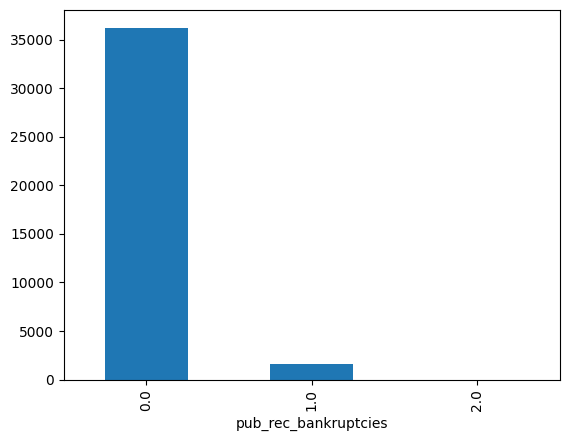

In [123]:
features_df.pub_rec_bankruptcies.value_counts().plot.bar()
plt.show()

As we can see majority of the rows have public record of bankrupties as 0. We can impute the NaN with 0 or the Mode of the column which is also 0. 

In [124]:
features_df.pub_rec_bankruptcies.fillna(features_df.pub_rec_bankruptcies.mode()[0], inplace = True)

In [125]:
features_df.pub_rec_bankruptcies.isnull().sum()

0

In [126]:
features_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

Clean up Employee length column data.

In [127]:
features_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [128]:
features_df.emp_length.fillna(features_df.emp_length.mode()[0], inplace = True)

In [132]:
features_df.emp_length.isna().sum()

0

The text can be removed from the column and the column datatype can be changed to Int.

In [133]:
features_df.emp_length = features_df.emp_length.apply(lambda x: 0 if x == '< 1 year' else (10 if x == '10+ years' else str(x).split()[0]))

In [134]:
features_df.emp_length.unique()

array([10, 0, '3', '8', '9', '4', '5', '1', '6', '2', '7'], dtype=object)

In [138]:
# features_df[['grade', 'sub_grade']] = features_df[['grade', 'sub_grade']].astype(str)
features_df.emp_length = features_df.emp_length.astype(int)

In [139]:
features_df.isnull().sum()*100/features_df.shape[0]

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

The 'revol_util' column has only 0.13% null values. As it is very low percent, it can be dropped without impacting the analysis. 

In [140]:
total_row_count_before_dropping_na = features_df.shape[0]
total_row_count_before_dropping_na

38577

In [141]:
features_df.dropna(subset = ['revol_util'], inplace=True)

In [142]:
total_row_count_after_dropping_na = features_df.shape[0]
total_row_count_after_dropping_na

38527

In [143]:
round(total_row_count_after_dropping_na*100/total_row_count_before_dropping_na, 2)

99.87

In [144]:
features_df.revol_util.isnull().sum()

0

In [145]:
features_df.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38527, dtype: object

In [146]:
features_df['revol_util'] = features_df.revol_util.apply(lambda x: round(float(x.split('%')[0]), 2))

In [147]:
features_df.isnull().sum().sort_values()

id                      0
revol_util              0
pub_rec                 0
open_acc                0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
total_acc               0
annual_inc              0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt_inv         0
funded_amnt             0
loan_amnt               0
home_ownership          0
pub_rec_bankruptcies    0
dtype: int64

Now there are no null values in the dataset. The dataset can now enhanced with more features and corrected datatypes.

In [148]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38527 non-null  int64  
 1   loan_amnt             38527 non-null  int64  
 2   funded_amnt           38527 non-null  int64  
 3   funded_amnt_inv       38527 non-null  float64
 4   term                  38527 non-null  object 
 5   int_rate              38527 non-null  object 
 6   installment           38527 non-null  float64
 7   grade                 38527 non-null  object 
 8   sub_grade             38527 non-null  object 
 9   emp_length            38527 non-null  int32  
 10  home_ownership        38527 non-null  object 
 11  annual_inc            38527 non-null  float64
 12  verification_status   38527 non-null  object 
 13  issue_d               38527 non-null  object 
 14  loan_status           38527 non-null  object 
 15  purpose               38

The columns needs to be analysed for data and data-type.

In [149]:
features_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [150]:
features_df.term = features_df.term.apply(lambda x: x.split()[0]).astype(int)

In [151]:
features_df.term.unique()

array([36, 60])

In [152]:
features_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,...,Dec-11,Fully Paid,credit_card,AZ,27.65,3,0,83.7,9,0.0
1,1077430,2500,2500,2500.0,60,15.27%,59.83,C,C4,0,...,Dec-11,Charged Off,car,GA,1.00,3,0,9.4,4,0.0
2,1077175,2400,2400,2400.0,36,15.96%,84.33,C,C5,10,...,Dec-11,Fully Paid,small_business,IL,8.72,2,0,98.5,10,0.0
3,1076863,10000,10000,10000.0,36,13.49%,339.31,C,C1,10,...,Dec-11,Fully Paid,other,CA,20.00,10,0,21.0,37,0.0
5,1075269,5000,5000,5000.0,36,7.90%,156.46,A,A4,3,...,Dec-11,Fully Paid,wedding,AZ,11.20,9,0,28.3,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07%,78.42,A,A4,4,...,Jul-07,Fully Paid,home_improvement,CO,11.33,13,0,13.1,40,0.0
39713,90665,8500,8500,875.0,36,10.28%,275.38,C,C1,3,...,Jul-07,Fully Paid,credit_card,NC,6.40,6,0,26.9,9,0.0
39714,90395,5000,5000,1325.0,36,8.07%,156.84,A,A4,0,...,Jul-07,Fully Paid,debt_consolidation,MA,2.30,11,0,19.4,20,0.0
39715,90376,5000,5000,650.0,36,7.43%,155.38,A,A2,0,...,Jul-07,Fully Paid,other,MD,3.72,17,0,0.7,26,0.0


In [153]:
features_df.int_rate = features_df.int_rate.apply(lambda x: x.replace('%', '')).astype(float)

In [155]:
features_df.pub_rec_bankruptcies = features_df.pub_rec_bankruptcies.astype(int)

In [156]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38527 non-null  int64  
 1   loan_amnt             38527 non-null  int64  
 2   funded_amnt           38527 non-null  int64  
 3   funded_amnt_inv       38527 non-null  float64
 4   term                  38527 non-null  int32  
 5   int_rate              38527 non-null  float64
 6   installment           38527 non-null  float64
 7   grade                 38527 non-null  object 
 8   sub_grade             38527 non-null  object 
 9   emp_length            38527 non-null  int32  
 10  home_ownership        38527 non-null  object 
 11  annual_inc            38527 non-null  float64
 12  verification_status   38527 non-null  object 
 13  issue_d               38527 non-null  object 
 14  loan_status           38527 non-null  object 
 15  purpose               38

In [157]:
features_df['issue_date'] = pd.to_datetime(features_df.issue_d, format = '%b-%y')

In [158]:
features_df[['issue_date', 'issue_d']]

,issue_date,issue_d
0,2011-12-01,Dec-11
1,2011-12-01,Dec-11
2,2011-12-01,Dec-11
3,2011-12-01,Dec-11
5,2011-12-01,Dec-11
...,...,...
39712,2007-07-01,Jul-07
39713,2007-07-01,Jul-07
39714,2007-07-01,Jul-07
39715,2007-07-01,Jul-07


In [159]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38527 non-null  int64         
 1   loan_amnt             38527 non-null  int64         
 2   funded_amnt           38527 non-null  int64         
 3   funded_amnt_inv       38527 non-null  float64       
 4   term                  38527 non-null  int32         
 5   int_rate              38527 non-null  float64       
 6   installment           38527 non-null  float64       
 7   grade                 38527 non-null  object        
 8   sub_grade             38527 non-null  object        
 9   emp_length            38527 non-null  int32         
 10  home_ownership        38527 non-null  object        
 11  annual_inc            38527 non-null  float64       
 12  verification_status   38527 non-null  object        
 13  issue_d              

In [160]:
features_df.pub_rec.value_counts()

pub_rec
0    36459
1     2011
2       48
3        7
4        2
Name: count, dtype: int64

The data has been cleaned up, few derived columns can be created.

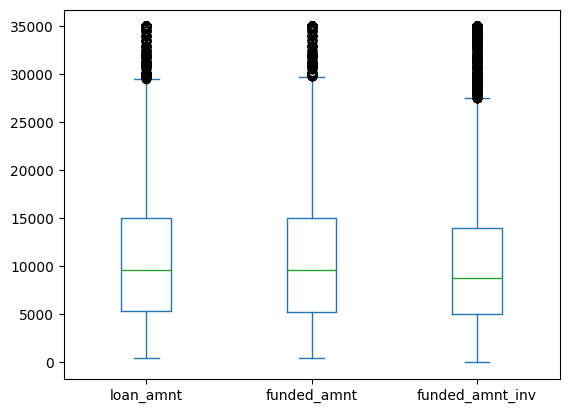

In [162]:
features_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].plot.box()
plt.show()

In [163]:
features_df[features_df['loan_amnt']>30000]['loan_status'].value_counts()*100/features_df[features_df['loan_amnt']>30000]['loan_status'].count()

loan_status
Fully Paid     75.510204
Charged Off    24.489796
Name: count, dtype: float64

In [164]:
pd.qcut(features_df['int_rate'], q=4, precision =0, labels = ['Low', 'Moderate', 'High', 'Very High']).value_counts()

int_rate
Low          9808
Very High    9613
High         9601
Moderate     9505
Name: count, dtype: int64

In [166]:

features_df['int_rate_group'] = pd.qcut(features_df['int_rate'], q=4, precision =0, labels = ['Low', 'Moderate', 'High', 'Very High'])


In [167]:
features_df['annual_inc_group'] = pd.qcut(features_df['annual_inc']/1000, q=4, precision =0, labels = ['3-41K', '41-60K', '60-83K', '83-6000K'])

In [168]:

features_df['dti_group'] = pd.qcut(features_df['dti'], q=4, precision =0, labels = ['Low', 'Moderate', 'High', 'Very High'])



In [169]:
features_df['open_acc_group'] = pd.qcut(features_df['open_acc'], q=4, precision =0, labels = ['Low', 'Moderate', 'High', 'Very High'])
features_df['total_acc_group'] = pd.qcut(features_df['total_acc'], q=4, precision =0, labels = ['Low', 'Moderate', 'High', 'Very High'])

In [170]:
features_df['revol_util_group'] = pd.qcut(features_df['revol_util'], q=4, precision =0, labels = ['Low', 'Moderate', 'High', 'Very High'])

In [171]:
features_df['issue_date_year'] = features_df['issue_date'].dt.year

In [172]:
features_df['issue_date_month'] = features_df['issue_date'].dt.month

In [282]:
features_df['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

In [283]:
features_df['home_ownership'] = features_df['home_ownership'].apply(lambda x: x if x != 'NONE' else 'OTHER')

In [284]:
features_df['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

In [174]:
features_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'issue_date', 'int_rate_group',
       'annual_inc_group', 'dti_group', 'open_acc_group', 'total_acc_group',
       'revol_util_group', 'issue_date_year', 'issue_date_month'],
      dtype='object')

In [175]:
column_names = {	
    'id': 'Loan Application ID',
    'loan_amnt'	:	'Loan Amount',
    'funded_amnt':'Funded Loan Amount',
    'installment':'Installment Amount',
    'annual_inc':'Borrower Annual Income',
    'purpose':'Purpose of Loan',
    'total_acc':'Total Credit Accounts',
    'issue_date_month':'Loan Funded Month',
    'open_acc_group':'Open Credit Accounts - Group',
    'funded_amnt_inv':'Funded Amount by Investor',
    'grade':'Grade',
    'verification_status':'Verification Status',
    'addr_state':'Address State of Borrower',
    'pub_rec_bankruptcies':'Public Record of Bankrupcies',
    'issue_date_year':'Loan Funded Year',
    'total_acc_group':'Total Credit Accounts - Group',
    'term':'Loan Term - Months',
    'sub_grade':'Sub-Grade',
    'issue_d':'Loan Funded Date - Short',
    'dti':'DTI',
    'issue_date':'Loan Funded Date',
    'annual_inc_group':'Borrower Annual Income - Group',
    'revol_util_group':'Revolving Line Utilization - Group',
    'int_rate':'Interest Rate',
    'emp_length':'Employee Tenure',
    'loan_status':'Loan Status',
    'open_acc':'Open Line of Credit',
    'int_rate_group':'Interest Rate - Group',
    'dti_group':'DTI - Group',
    'pub_rec':'Public Records',
    'revol_util':'Revolving Line Utilization',
    'home_ownership':'Home Ownership'
}


In [285]:
transformed_df = features_df.copy()

In [286]:
transformed_df.rename(columns = column_names, inplace = True)

In [287]:
transformed_df

,Loan Application ID,Loan Amount,Funded Loan Amount,Funded Amount by Investor,Loan Term - Months,Interest Rate,Installment Amount,Grade,Sub-Grade,Employee Tenure,...,Public Record of Bankrupcies,Loan Funded Date,Interest Rate - Group,Borrower Annual Income - Group,DTI - Group,Open Credit Accounts - Group,Total Credit Accounts - Group,Revolving Line Utilization - Group,Loan Funded Year,Loan Funded Month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,0,2011-12-01,Moderate,3-41K,Very High,Low,Low,Very High,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,0,2011-12-01,Very High,3-41K,Low,Low,Low,Low,2011,12
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,0,2011-12-01,Very High,3-41K,Moderate,Low,Low,Very High,2011,12
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,0,2011-12-01,High,41-60K,Very High,High,Very High,Low,2011,12
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,0,2011-12-01,Low,3-41K,Moderate,Moderate,Low,Moderate,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,A4,4,...,0,2007-07-01,Low,83-6000K,Moderate,Very High,Very High,Low,2007,7
39713,90665,8500,8500,875.0,36,10.28,275.38,C,C1,3,...,0,2007-07-01,Moderate,3-41K,Low,Low,Low,Moderate,2007,7
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,A4,0,...,0,2007-07-01,Low,83-6000K,Low,High,Moderate,Low,2007,7
39715,90376,5000,5000,650.0,36,7.43,155.38,A,A2,0,...,0,2007-07-01,Low,83-6000K,Low,Very High,High,Low,2007,7


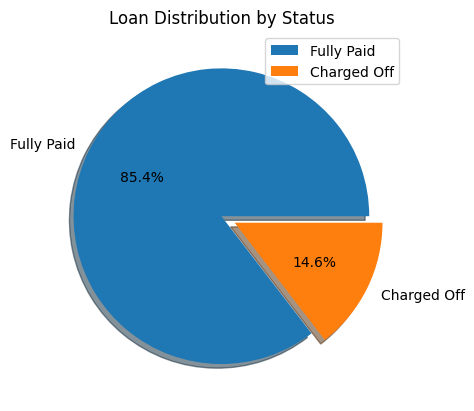

In [288]:
transformed_df['Loan Status'].value_counts().plot.pie(autopct='%1.1f%%', 
                                                      explode = (0, 0.1), 
                                                      shadow =True
                                                      )
plt.title('Loan Distribution by Status')
plt.legend()
plt.ylabel('')
plt.show()

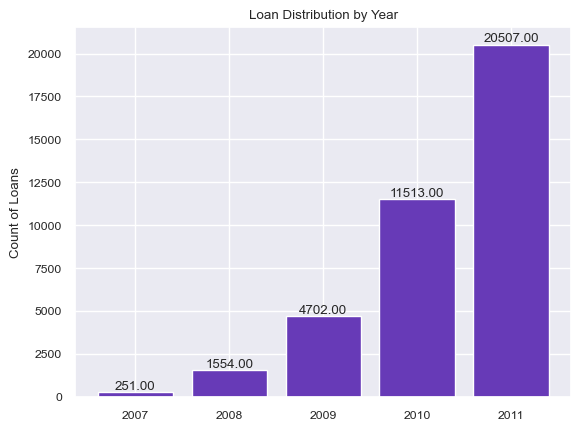

In [543]:
# transformed_df['Loan Funded Year'].value_counts().sort_index().plot.bar(color='green')

bars = plt.bar(transformed_df['Loan Funded Year'].unique(), transformed_df['Loan Funded Year'].value_counts(), color = '#673AB7')
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        yval + 1,   
        f'{yval:.2f}',  
        ha='center',  
        va='bottom'   
    )
plt.title('Loan Distribution by Year')
plt.ylabel('Count of Loans')

plt.show()

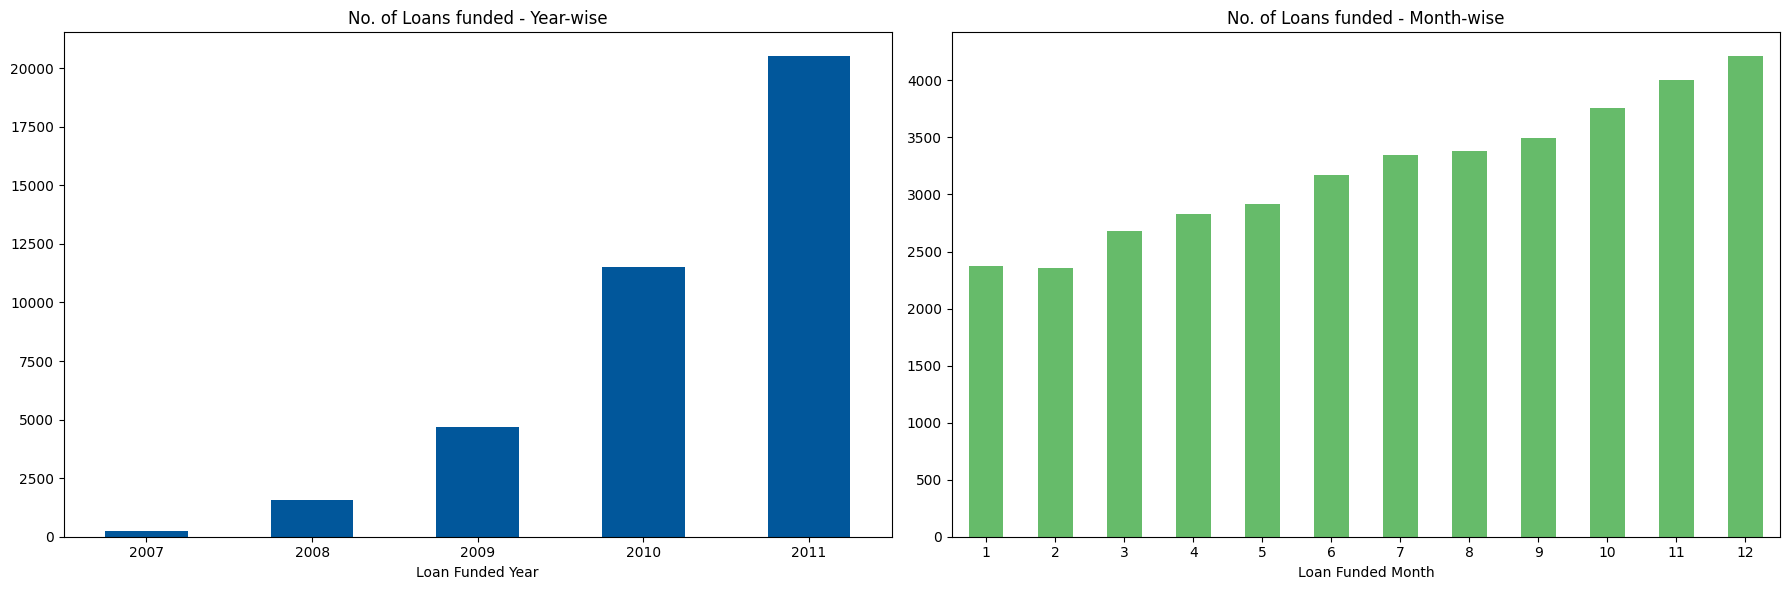

In [290]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot each metric on a different subplot
transformed_df['Loan Funded Year'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='#01579B', title='No. of Loans funded - Year-wise')
plt.xticks(rotation = 0)
transformed_df['Loan Funded Month'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color='#66BB6A', title='No. of Loans funded - Month-wise')

# Adjust layout
for ax in axs:
    ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

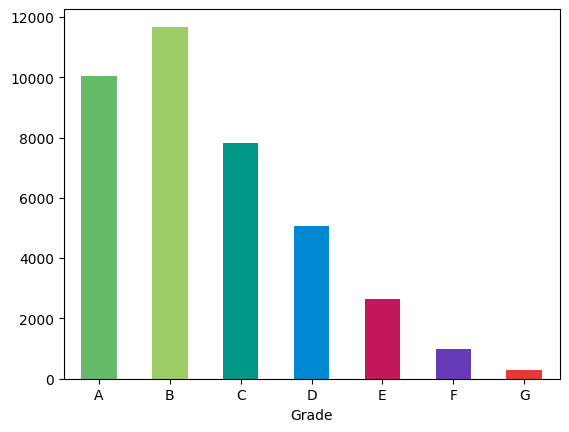

In [291]:
transformed_df['Grade'].value_counts().sort_index().plot(kind='bar', color = ['#66BB6A', '#9CCC65', '#009688', '#0288D1', '#C2185B', '#673AB7', '#E53935'])
plt.xticks(rotation = 0)
plt.show()

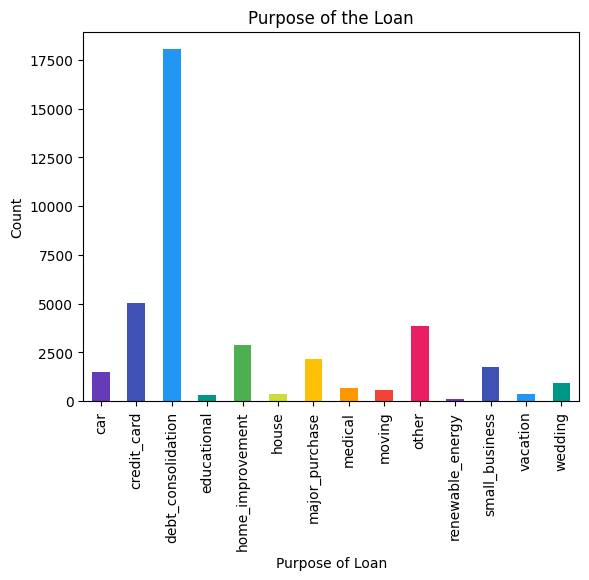

In [292]:
transformed_df['Purpose of Loan'].value_counts().sort_index().plot(kind='bar', 
                                                                   color = ['#673AB7', '#3F51B5', '#2196F3', '#009688', '#4CAF50', '#CDDC39', '#FFC107', '#FF9800', '#F44336', '#E91E63'],
                                                                  title = 'Purpose of the Loan')
                                                                  
plt.ylabel('Count')
plt.show()

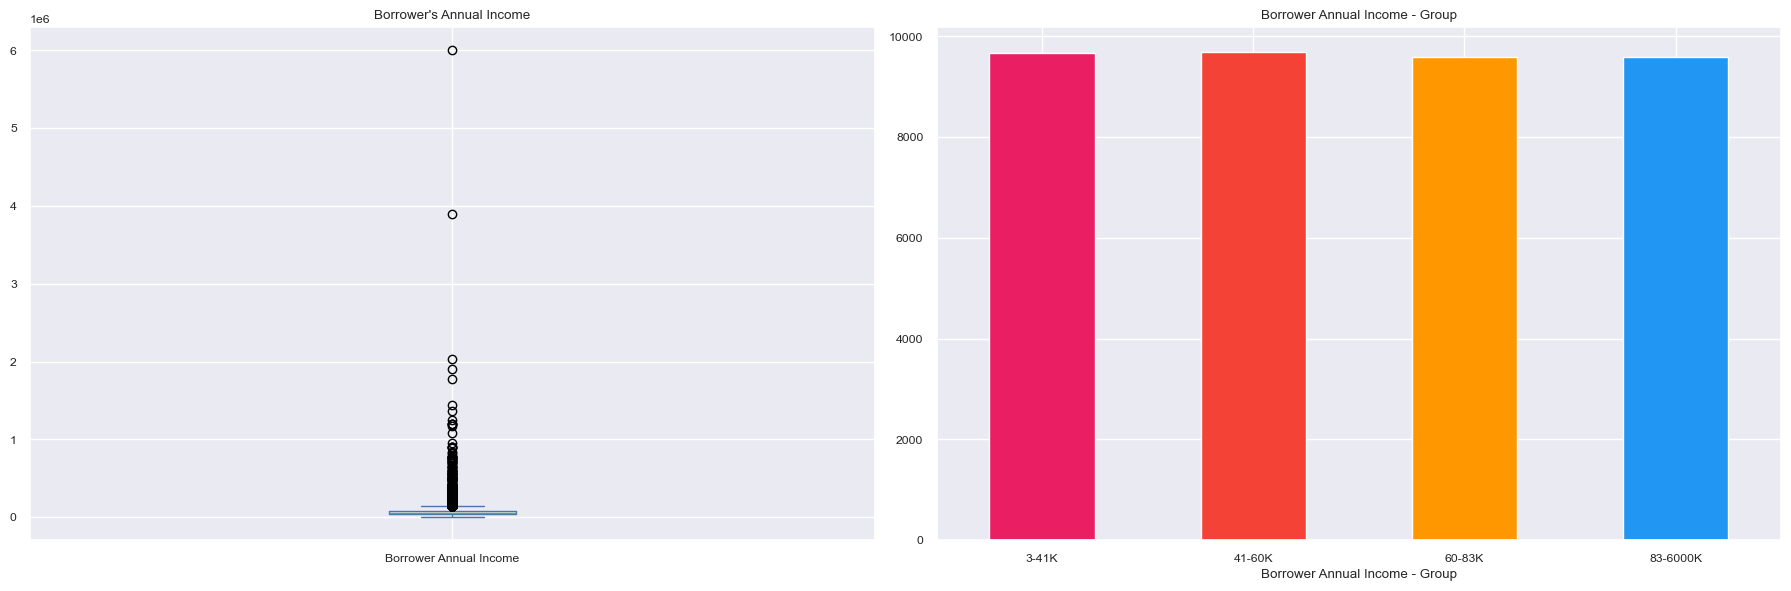

In [542]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot each metric on a different subplot
transformed_df['Borrower Annual Income'].plot(kind='box', ax=axs[0],
                                              title="Borrower's Annual Income")
plt.xticks(rotation = 0)
transformed_df['Borrower Annual Income - Group'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color=['#E91E63', '#F44336', '#FF9800', '#2196F3'], title='Borrower Annual Income - Group')

# Adjust layout
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

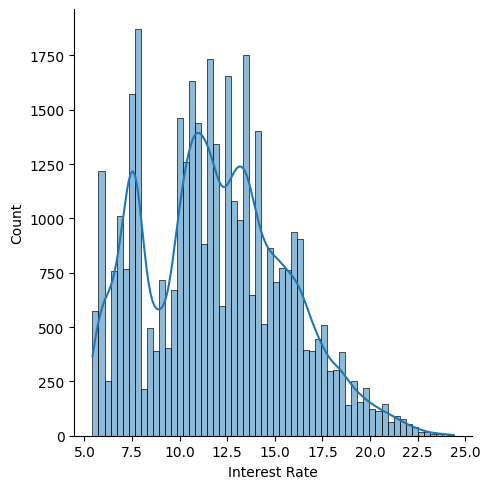

In [361]:
# from matplotlib.ticker import ScalarFormatter
# plt.gca().xaxis.set_major_formatter(ScalarFormatter())
sns.displot(transformed_df['Interest Rate'],  kde=True)
plt.show()

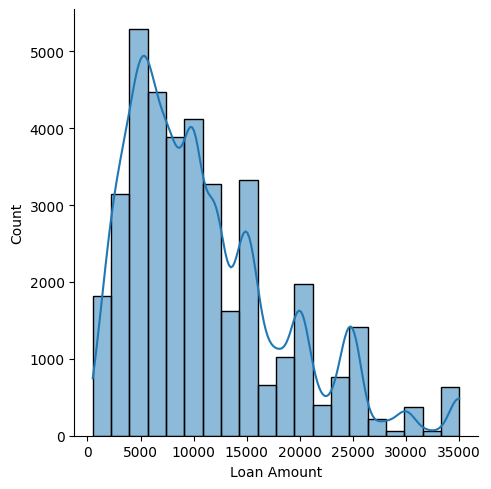

In [362]:
sns.displot(transformed_df['Loan Amount'],  bins=20, kde=True)
plt.show()


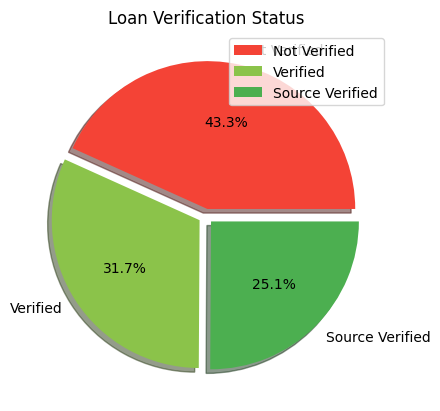

In [294]:
transformed_df['Verification Status'].value_counts().plot.pie(autopct='%1.1f%%', 
                                                      explode = (0.05, 0.05, 0.05), 
                                                      shadow =True,
                                                              colors = ['#F44336', '#8BC34A', '#4CAF50']
                                                      )
plt.title('Loan Verification Status')
plt.legend()
plt.ylabel('')
plt.show()

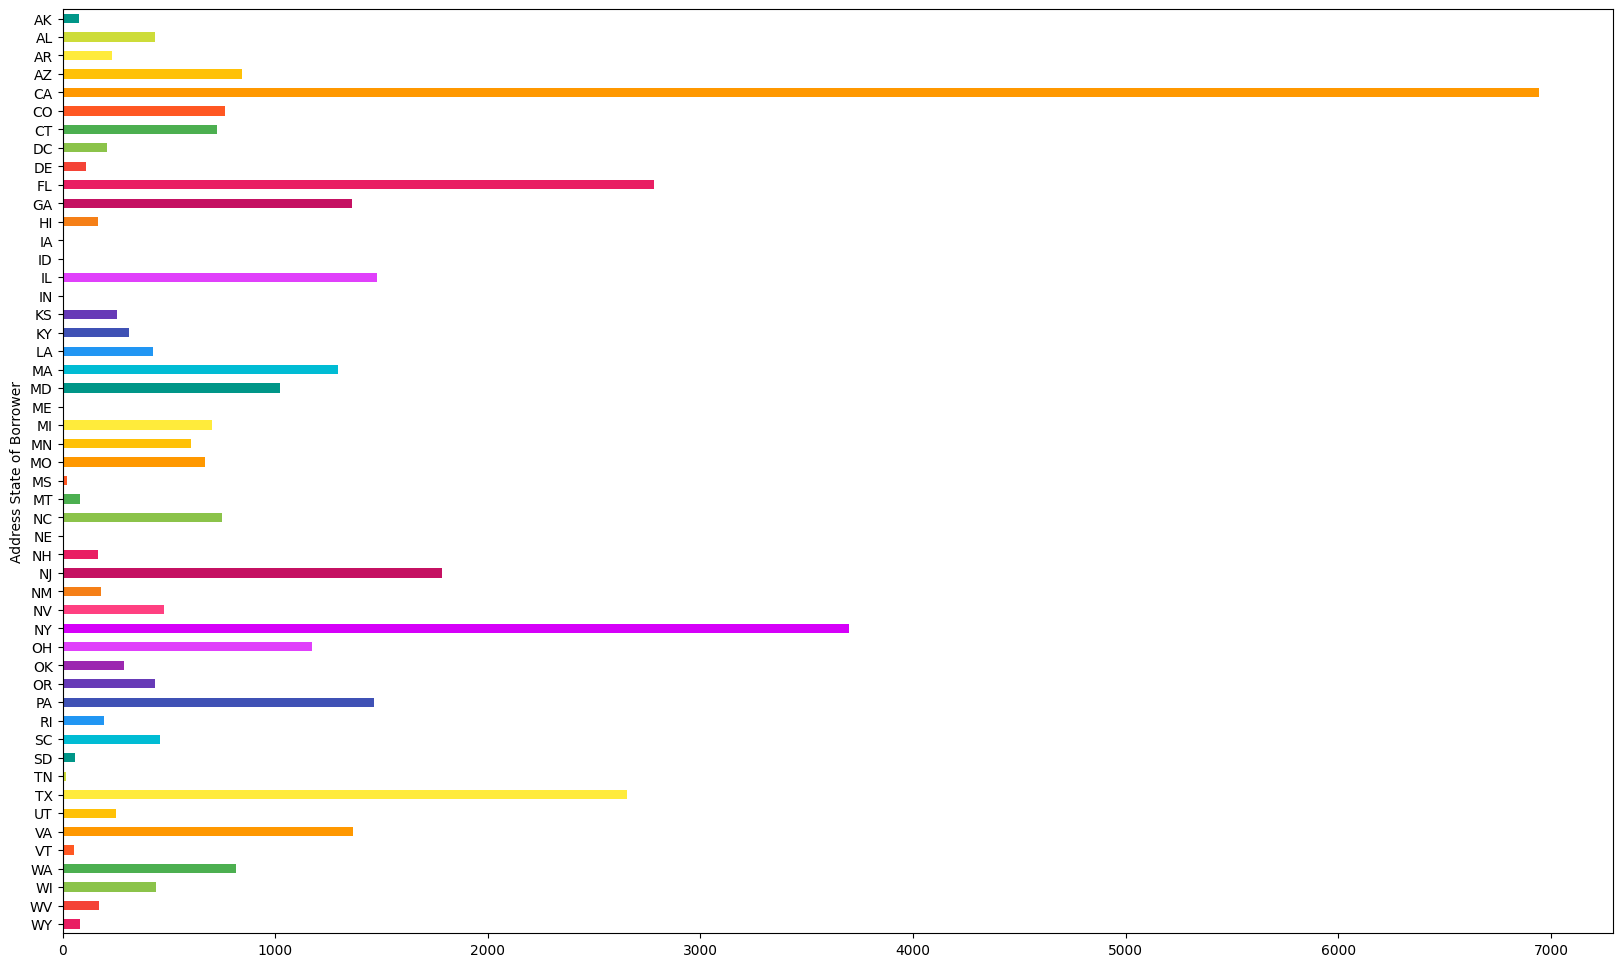

In [295]:

# transformed_df['Address State of Borrower'].value_counts().sort_index().plot.barh(height=0.6,color=['#E91E63', '#F44336', '#FF9800', '#2196F3'], title='Borrower Annual Income - Group')
plt.figure(figsize=(20, 12))

# Plotting the horizontal bar chart
ax = transformed_df['Address State of Borrower'].value_counts().sort_index(ascending = False).plot(kind='barh', x='Category', y='Values', color = ['#E91E63', '#F44336','#8BC34A', '#4CAF50',  '#FF5722', '#FF9800', '#FFC107', '#FFEB3B', '#CDDC39', '#009688', '#00BCD4', '#2196F3', '#3F51B5', '#673AB7', '#9C27B0', '#E040FB', '#D500F9', '#FF4081', '#F57F17', '#C51162'])

plt.show()

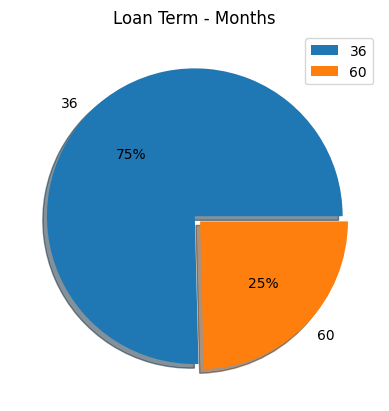

In [296]:
transformed_df['Loan Term - Months'].value_counts().plot.pie(autopct='%1.0f%%', 
                                                      explode = (0, 0.05), 
                                                      shadow =True
                                                      )
plt.title('Loan Term - Months')
plt.legend()
plt.ylabel('')
plt.show()

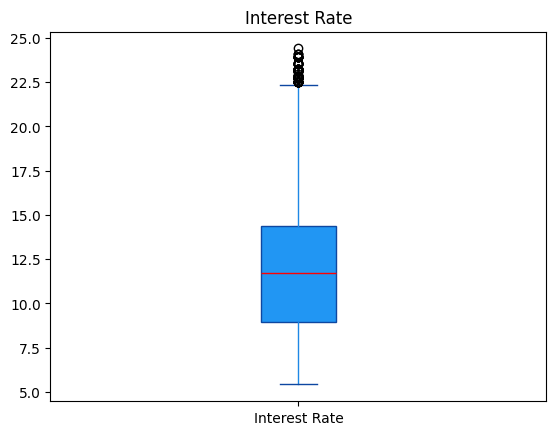

In [297]:

transformed_df['Interest Rate'].plot(kind='box',
                                              title="Interest Rate"
                                    , patch_artist=True,
                  boxprops=dict(facecolor= '#2196F3'  , color= '#0D47A1' ),
                  whiskerprops=dict(color= '#1E88E5' ),
                  capprops=dict(color= '#0D47A1'),
                  medianprops=dict(color= 'red'))
plt.show()

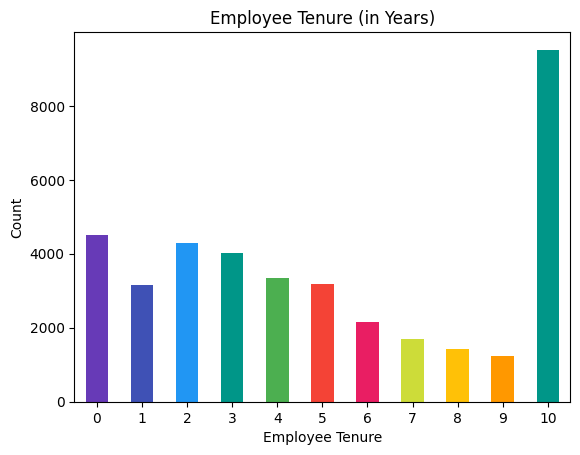

In [298]:

transformed_df['Employee Tenure'].value_counts().sort_index().plot(kind='bar', 
                                                                   color = ['#673AB7', '#3F51B5', '#2196F3', '#009688', '#4CAF50', '#F44336', '#E91E63', '#CDDC39', '#FFC107', '#FF9800', '#009688'],
                                                                   title = 'Employee Tenure (in Years)'
                                                                  )
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

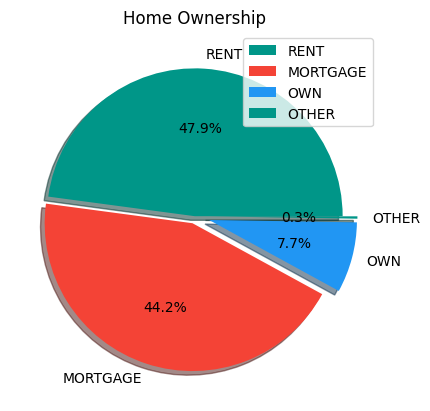

In [311]:
transformed_df['Home Ownership'].value_counts().plot.pie(autopct='%1.1f%%', 
                                                      explode = (0, 0.05, 0.1, 0.1), 
                                                      shadow =True ,
                                                         colors = ['#009688', '#F44336', '#2196F3', '#009688']
                                                      )
plt.title('Home Ownership')
plt.legend()
plt.ylabel('')
plt.show()

In [520]:
# Function definition to calculate the proportion of Charged Off Loan against the total data across a category.
# The function also plots the bar graph for the columns passed as parameters to calculate the proportion.

def calculate_proportion_and_plot(df, x_, y_, p, r = 0, size = 'default'): 
    """
    df: Dataframe or the datasource for calculation of propportion
    x_: The X component of the Bar Graph. Also, the Primary column cateogry against the data will be grouped.
    y_: The Y component of the Bar Graph. In this case, the data is being evaluated against the Loan Status. 
    p: Color Palette for the Bar Graph
    r: Rotation of x ticks, default = 0
    size: Size of the plot. default = 'default'
    """
    df_ = transformed_df.groupby([x_, y_])[y_].count().unstack().fillna(0).reset_index()
    df_['Total Loan Count'] = df_['Fully Paid'] + df_['Charged Off']
    df_['Charged Off %'] = df_['Charged Off'] / df_['Total Loan Count']
    df_.sort_values('Charged Off %', ascending=False)

    if size =='default':
        pass
    else:
        plt.figure(figsize=(20, 12))
    plt.title(f'{x_} vs Charged Off %')
    plt.xticks(rotation = r)
    sns.set(style="white")
    plt.gcf().set_facecolor('#FFF0F5')
    sns.barplot(data = df_, x = x_, y = 'Charged Off %', palette = p)
    plt.show()


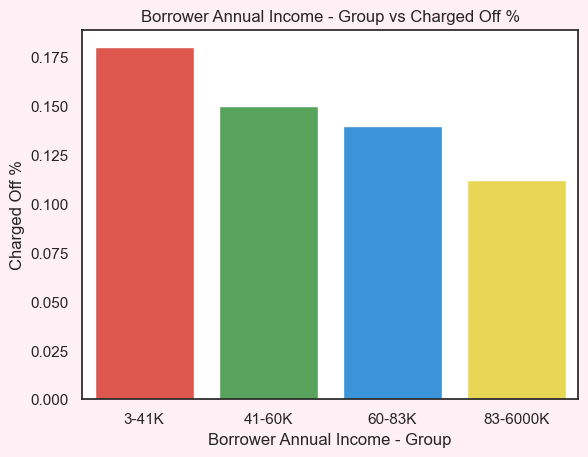

In [521]:
calculate_proportion_and_plot(transformed_df, 'Borrower Annual Income - Group', 'Loan Status', 
                              ['#F44336', '#4CAF50', '#2196F3', '#FFEB3B']
                             )

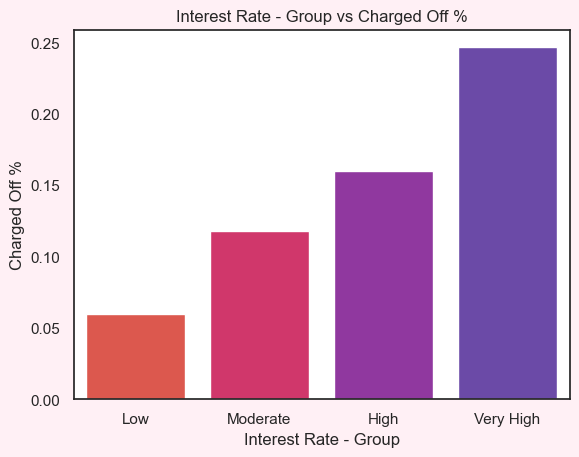

In [522]:
calculate_proportion_and_plot(transformed_df, 'Interest Rate - Group', 'Loan Status', 
                              ['#F44336', '#E91E63', '#9C27B0', '#673AB7']
                             )

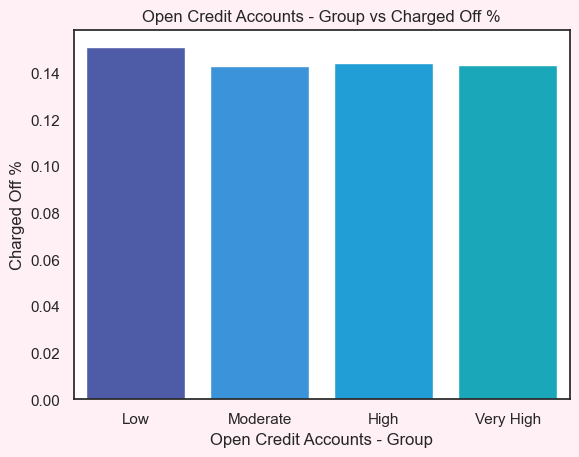

In [523]:
calculate_proportion_and_plot(transformed_df, 'Open Credit Accounts - Group', 'Loan Status', 
                              ['#3F51B5', '#2196F3', '#03A9F4', '#00BCD4'] 
                             )

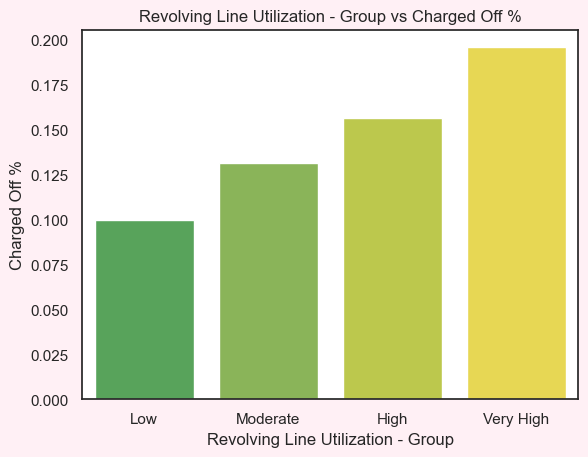

In [524]:
calculate_proportion_and_plot(transformed_df, 'Revolving Line Utilization - Group', 'Loan Status', 
                              ['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B']
                             )

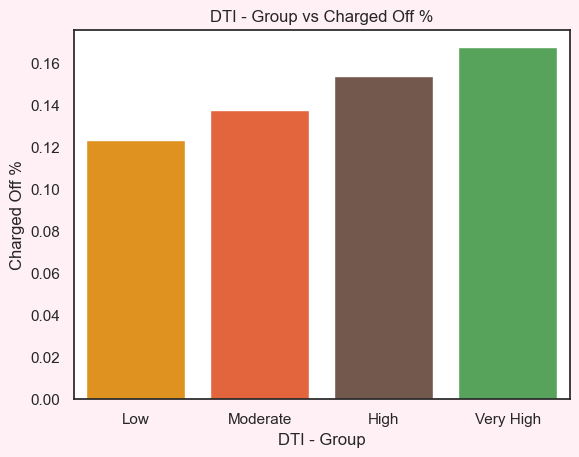

In [525]:

# DTI - Group against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'DTI - Group', 'Loan Status', 
                              ['#FF9800', '#FF5722', '#795548', '#4CAF50']
                             )

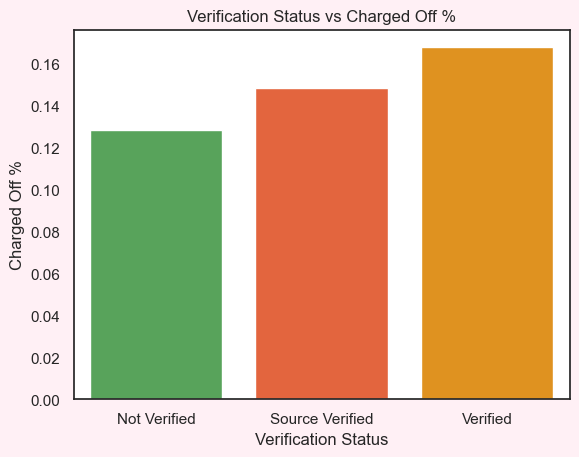

In [526]:

# DTI - Group against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Verification Status', 'Loan Status', [ '#4CAF50', '#FF5722','#FF9800'])

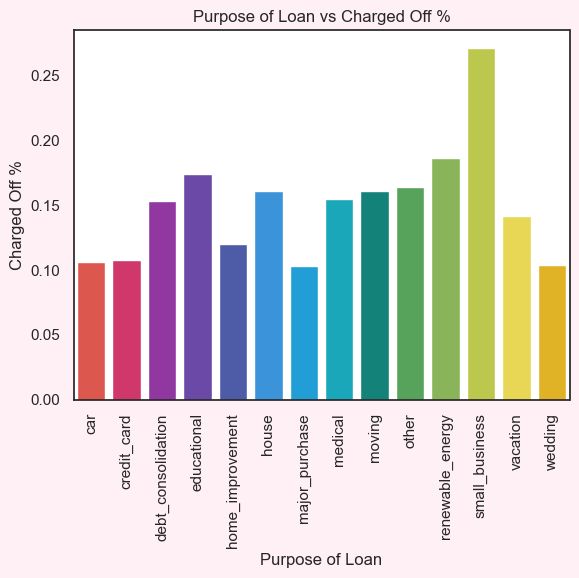

In [527]:

# DTI - Group against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Purpose of Loan', 'Loan Status', 
                              ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107']
                              , 90)

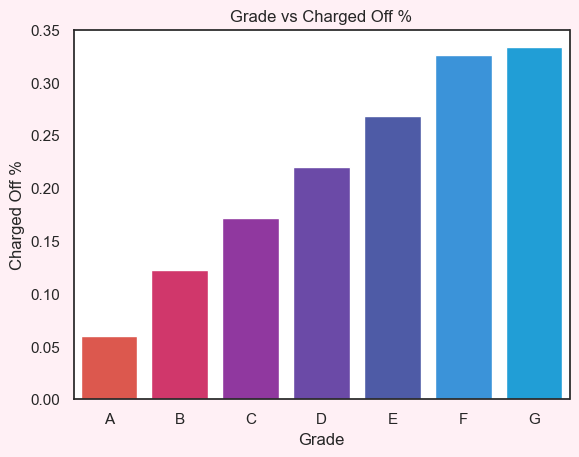

In [528]:

# Grade against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Grade', 'Loan Status', 
                              ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4']
                            )

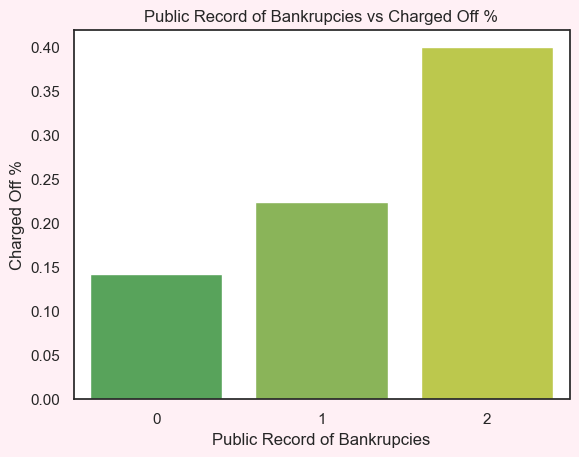

In [529]:
# Public Record of Bankrupcies against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Public Record of Bankrupcies', 'Loan Status', 
                              ['#4CAF50', '#8BC34A', '#CDDC39']
                            )

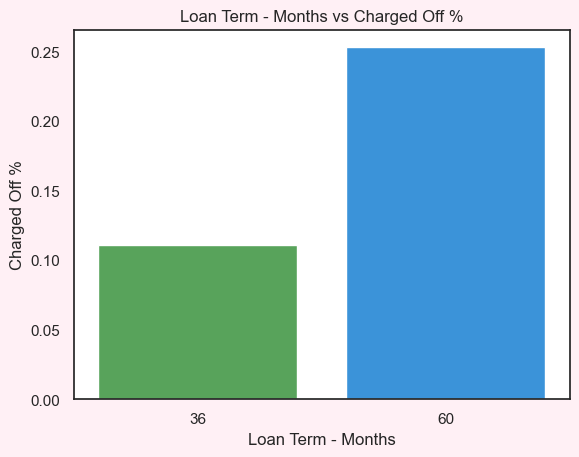

In [530]:
# Loan Term - Months against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Loan Term - Months', 'Loan Status', 
                              ['#4CAF50', '#2196F3']
                            )

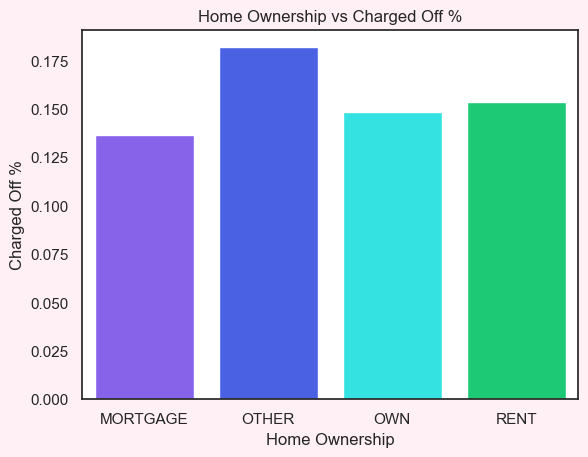

In [531]:
# Home Ownership against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Home Ownership', 'Loan Status', 
                             ['#7C4DFF', '#304FFE', '#18FFFF', '#00E676']
                            )

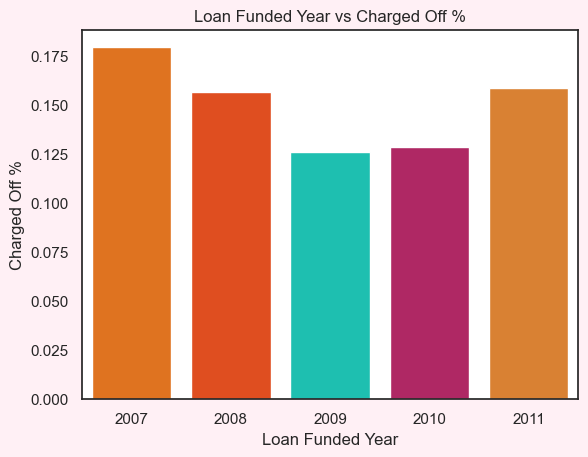

In [532]:
# Loan Funded Year against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Loan Funded Year', 'Loan Status', 
                             ['#FF6F00', '#FF3D00', '#03DAC6', '#C51162', '#F57F17']
                            )

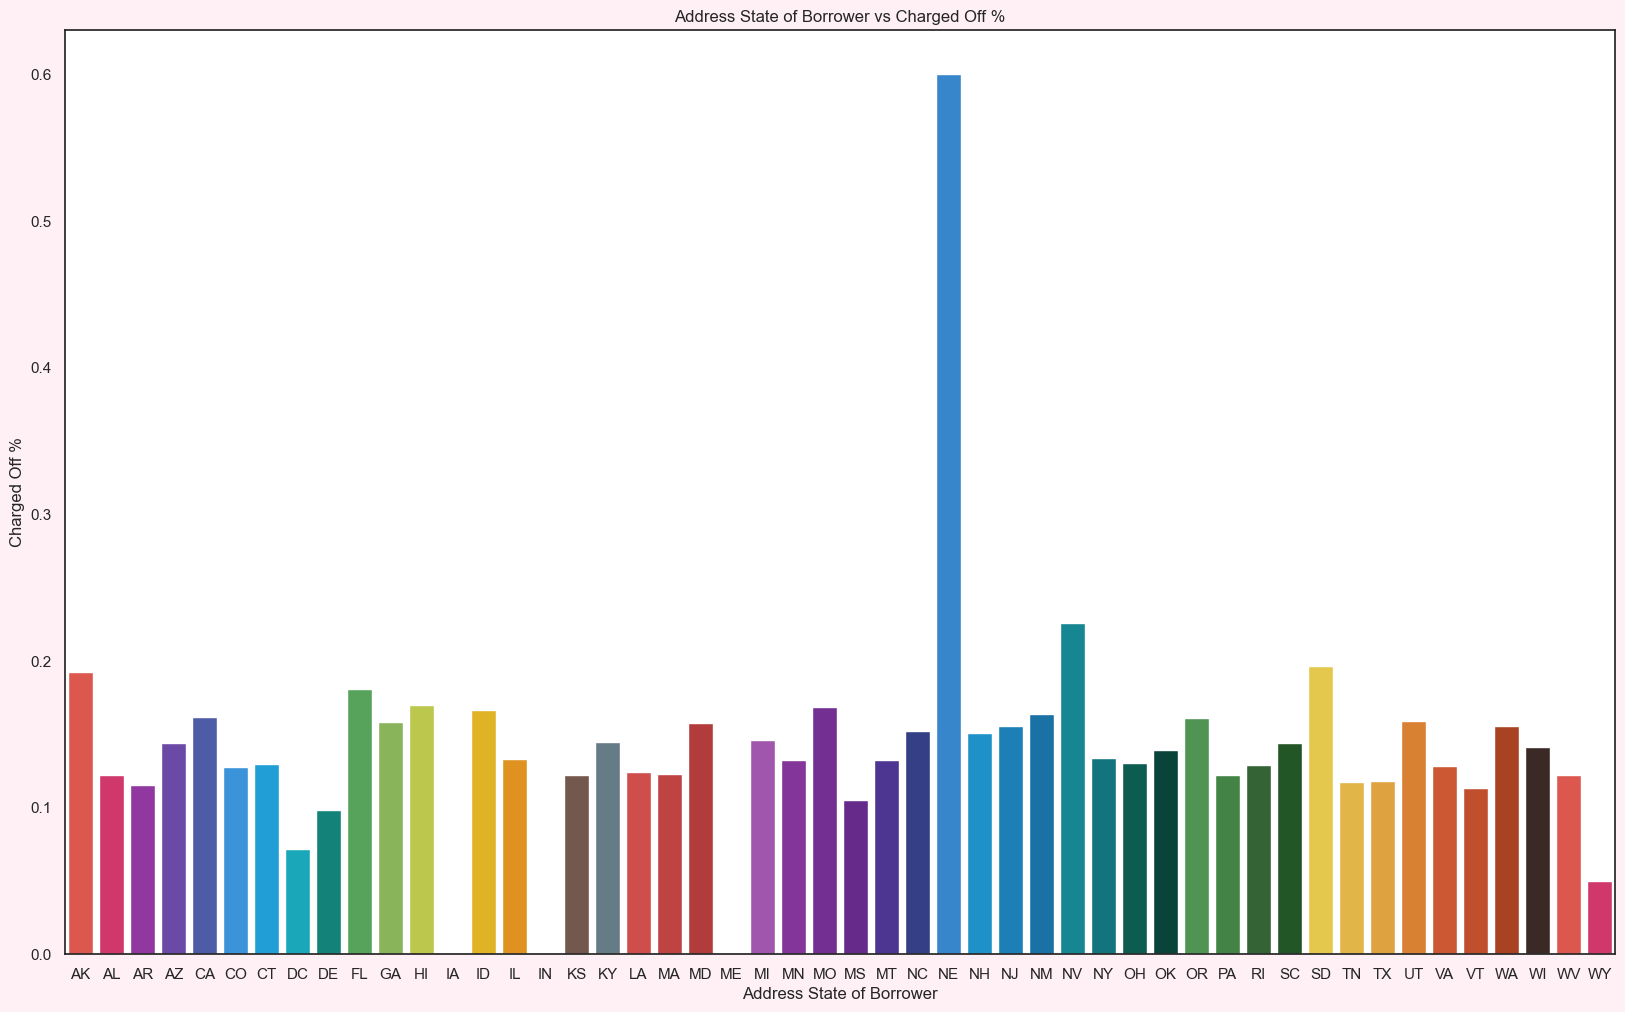

In [533]:
# Address State of Borrower against Chargedoff %

calculate_proportion_and_plot(transformed_df, 'Address State of Borrower', 'Loan Status', 
                             ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', 
                              '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107',
                              '#FF9800', '#FF5722', '#795548', '#607D8B', '#E53935', '#D32F2F', '#C62828', 
                              '#B71C1C', '#AB47BC', '#8E24AA', '#7B1FA2', '#6A1B9A', '#4527A0', '#283593', 
                              '#1E88E5', '#039BE5', '#0288D1', '#0277BD', '#0097A7', '#00838F', '#00695C', 
                              '#004D40', '#43A047', '#388E3C', '#2C6B2F', '#1B5E20', '#FDD835',
                              '#FBC02D', '#F9A825', '#F57F17', '#E64A19', '#D84315', '#BF360C', '#3E2723'], size = 'large'
                            )

In [534]:
# Get List of Number columns for Correlation mapping
transformed_df.select_dtypes(include=['number']).columns

Index(['Loan Application ID', 'Loan Amount', 'Funded Loan Amount',
       'Funded Amount by Investor', 'Loan Term - Months', 'Interest Rate',
       'Installment Amount', 'Employee Tenure', 'Borrower Annual Income',
       'DTI', 'Open Line of Credit', 'Public Records',
       'Revolving Line Utilization', 'Total Credit Accounts',
       'Public Record of Bankrupcies', 'Loan Funded Year',
       'Loan Funded Month'],
      dtype='object')

In [535]:
# Reducing the columns for Correlation (heatmap) plot.
columns_for_correlation_calc_ = ['Loan Amount',   'Loan Term - Months', 'Interest Rate',
       'Installment Amount', 'Employee Tenure', 'Borrower Annual Income',
       'DTI', 'Open Line of Credit', 'Revolving Line Utilization',  'Public Record of Bankrupcies']

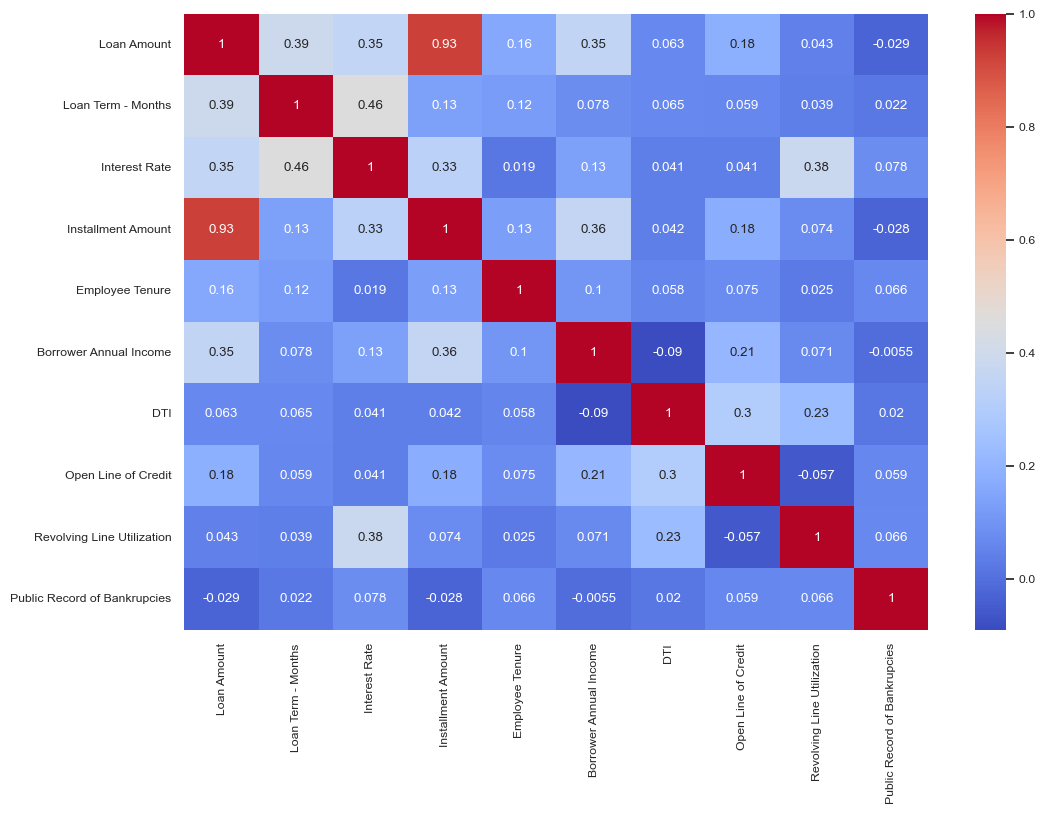

In [541]:
# Calculate the Correlation among the data only for the Loan that has been Charged Off.
# Plot the heatmap
corr_dataframe = transformed_df[transformed_df['Loan Status'] =='Charged Off'][columns_for_correlation_calc_]
corr_ = corr_dataframe.corr()
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_, cmap='coolwarm',  annot=True)
plt.show()

#### Recommendations:
- Company  should work on the improvement of their verification system.
- State Nebraska should be put under caution, whenever resident apply for loan it will highlighted.
- Public record of bankruptcy has weak coorelation with Loan Amount. The Bank needs to improve their processes. It should be a strong Negative correlation. So, while lending to a borrower with bankruptcy, the bank should sanction a lower loan amount.
- While new loan sanction company should always consider following variables:
    - Grade
    - Higher DTI ratio
    - Public Bankruptcies record
    - Revolving Line Utilization
- For example: Customer with A grade , low DTI ratio (less than 8), No bankruptcy record  and low revolving line utilization can ideal loan candidate
